<a href="https://colab.research.google.com/github/vidushi-25/Black-Friday-Shopper-Insights-Python-Project/blob/main/Black_Friday_Shopper_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing dataset and pandas

In [1]:
!git clone https://github.com/vidushi-25/datasets

import pandas as pd

df = pd.read_csv('/content/datasets/BlackFriday.csv')
df.head()

fatal: destination path 'datasets' already exists and is not an empty directory.


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## 2. Exploring and Cleaning the Data
##### 2.1) Checking null values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [3]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

##### 2.2) Dealing with null values

In [4]:
del df['Product_Category_2']
del df['Product_Category_3']

##### 2.3) Checking categories in each column

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


2.4) Printing all column names

In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

2.5) Finding number of unique values in each column

In [7]:
for i in df.columns:
    print(i,":",df[i].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


2.6) Finding unique values of each Column

In [8]:
for i in df.columns:

  print(i, ':', df[i].unique())


User_ID : [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender : ['F' 'M']
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category : ['A' 'C' 'B']
Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']
Marital_Status : [0 1]
Product_Category_1 : [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Purchase : [ 8370 15200  1422 ... 14539 11120 18426]


##### 2.7) Removing un-necessery columns

In [9]:
#Removed unnecessary columns while dealing with null values

## 3. Data Analysis

In [10]:
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pyp

##### **3.1) Analysing gender distribution**

In [11]:
df.groupby(by = 'Gender')['Purchase'].sum()

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<Axes: title={'center': 'Gender Distribution'}>

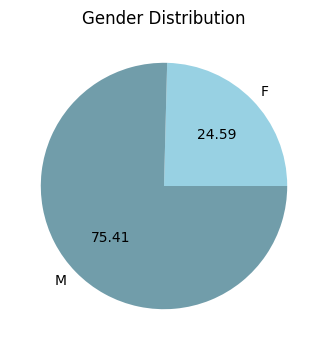

In [12]:
#Gender Distribution
df.groupby(by = 'Gender').size().plot(
    kind = 'pie',
    figsize = (4,4),
    autopct = '%.2f',
    colors = ['#98D1E3', '#719DAA'],
    title = 'Gender Distribution')

<Axes: title={'center': 'Gender Distribution - Purchase Value Percentage'}, ylabel='Purchase'>

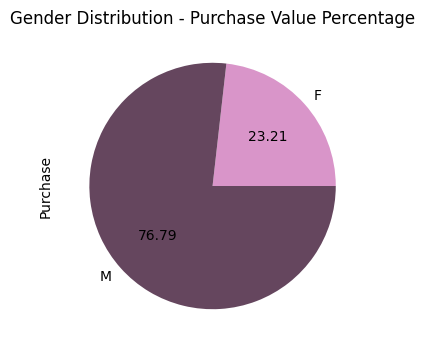

In [13]:
#Gender Distribution - Purchase Value Percentage
df.groupby(by = 'Gender')['Purchase'].sum().plot.pie(
    y = 'Density',
    figsize = (4,4),
    colors = ['#D995C9', '#65465E'],
    autopct = '%.2f',
    title = 'Gender Distribution - Purchase Value Percentage'
    )

##### **3.2) Average Amount Spend per Product by Gender**

<Axes: title={'center': 'Gender Distribution - Avg Purchase Value Percentage'}, ylabel='Purchase'>

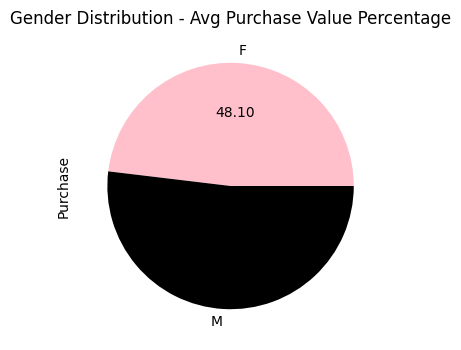

In [14]:
df.groupby(by = 'Gender')['Purchase'].mean().plot.pie(
    y = 'Density',
    figsize = (4,4),
    colors = ['pink', 'black'],
    autopct = '%.2f',
    title = 'Gender Distribution - Avg Purchase Value Percentage'
    )

##### **3.3) Analysing Product Distribution based on Age**

<Axes: title={'center': 'Age Distribution'}, xlabel='Age'>

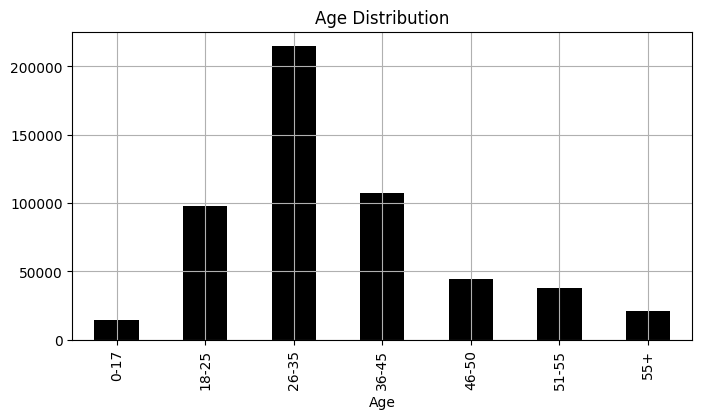

In [15]:
df.groupby(by = 'Age').size().plot(
    kind='bar',
    figsize=(8,4),
    title='Age Distribution',
    color='black',
    grid=True
)

##### **3.4) Analysing amount spend by age**

<Axes: title={'center': 'Age Distribution - Purchase Value'}, ylabel='Purchase'>

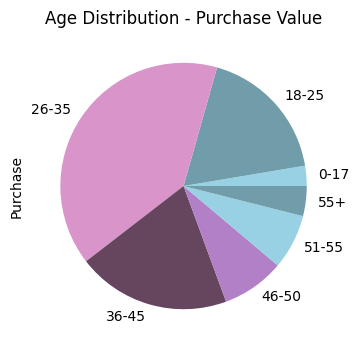

In [16]:
df.groupby(by = 'Age')['Purchase'].sum().plot(
    kind = 'pie',
    figsize = (4,4),
    colors = ['#98D1E3', '#719DAA', '#D995C9', '#65465E', '#B280C6'],
    title = 'Age Distribution - Purchase Value',
    )

##### **3.5) Analysing average amount spend by age**

<Axes: title={'center': 'Average Amount spent by Age'}, xlabel='Age'>

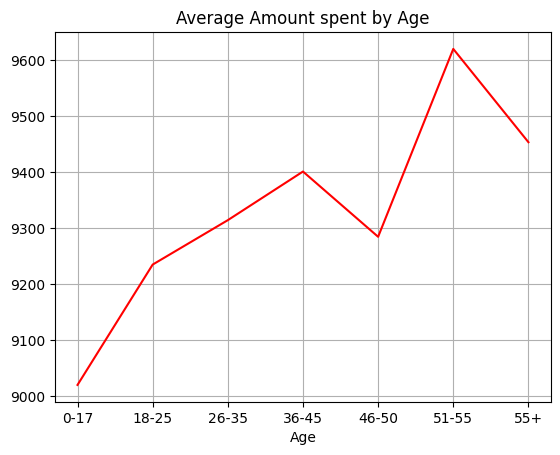

In [17]:
df.groupby(by='Age')['Purchase'].mean().plot(grid=True, color='red', title = 'Average Amount spent by Age')

##### **3.6) Analysing marital status**

<Axes: title={'center': 'Marital Status'}>

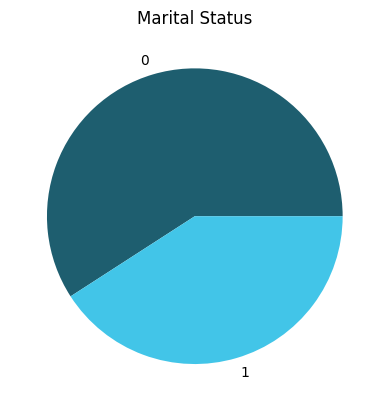

In [18]:
df.groupby(by='Marital_Status').size().plot(
    kind='pie',
    colors=['#1E5E6F','#42C5E8'],
    title='Marital Status'
    )

##### **3.7) Analyse purchase by Age & Gender**

Text(0.5, 1.0, 'Order distribution by Age and Gender')

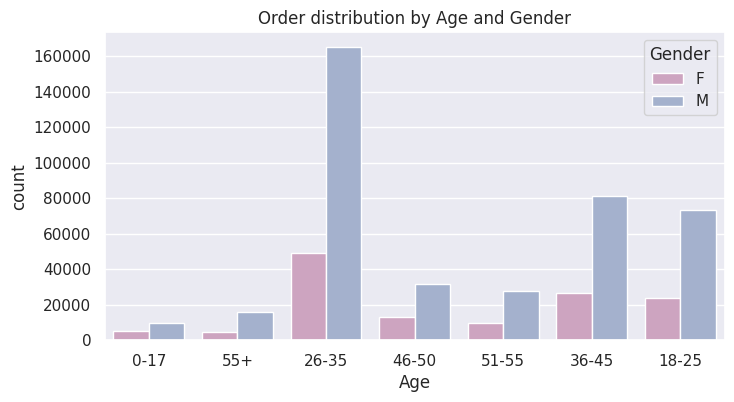

In [19]:
sns.set(rc={'figure.figsize':(8,4)})
palette=['#D49DC2','#9DAFD4']
sns.countplot(x='Age', hue='Gender', data =df, palette=palette)
title = 'Order distribution by Age and Gender'
pyp.title(title)

Text(0.5, 1.0, 'Order distribution by Gender and Age')

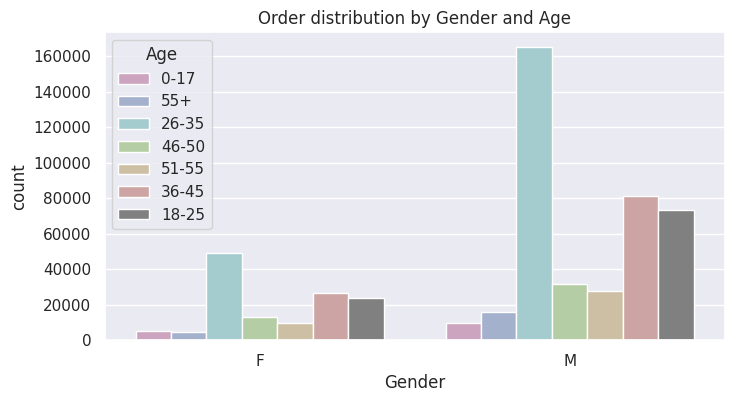

In [20]:
sns.set(rc={'figure.figsize':(8,4)})
palettep=['#D49DC2','#9DAFD4','#9DD1D4','#B4D49D','#D4C19D','#D49D9D','grey']
sns.countplot(x='Gender', hue='Age', data =df, palette=palettep)
title = 'Order distribution by Gender and Age'
pyp.title(title)

##### **3.8) Analyse purchase by Marital Status & Gender**

Text(0.5, 1.0, 'Order distribution by Marital Status and Gender')

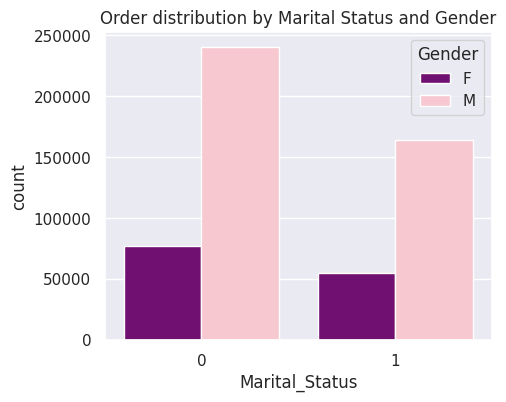

In [21]:
sns.set(rc={'figure.figsize':(5,4)})
palette=['purple','pink']
sns.countplot(x='Marital_Status', hue='Gender', data =df, palette=palette)
title = 'Order distribution by Marital Status and Gender'
pyp.title(title)

##### **3.9) Analyse purchase by City & Gender**

Text(0.5, 1.0, 'Order distribution by City and Gender')

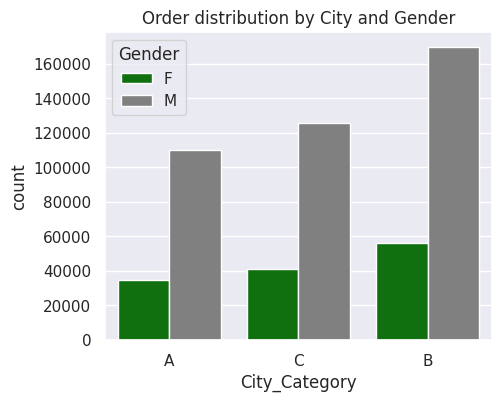

In [22]:
sns.set(rc={'figure.figsize':(5,4)})
palette=['green','grey']
sns.countplot(x='City_Category', hue='Gender', data =df, palette=palette)
title = 'Order distribution by City and Gender'
pyp.title(title)

##### **3.10) Total collection in each city?**

In [23]:
import matplotlib.pyplot as plt

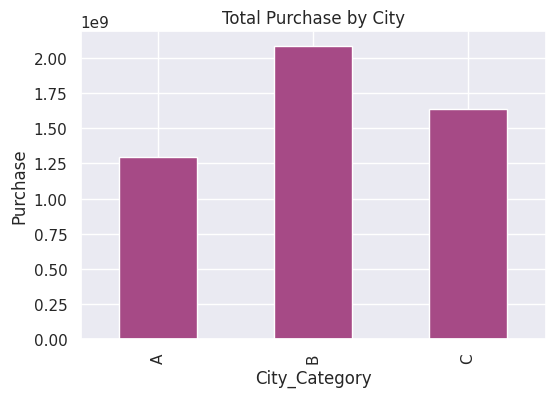

In [24]:
df.groupby(by='City_Category')['Purchase'].sum().plot(
    kind='bar',
    grid=True,
    color='#A64A86',
    figsize=(6,4)
)

plt.xlabel('City_Category')
plt.ylabel('Purchase')
plt.title('Total Purchase by City')


plt.show()

##### **3.11) Average collection in each city?**

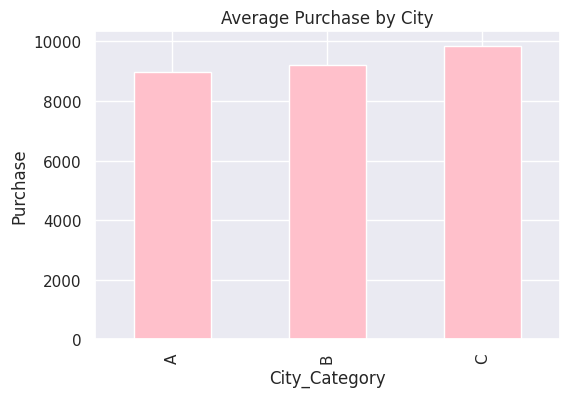

In [25]:
df.groupby(by='City_Category')['Purchase'].mean().plot(
    kind='bar',
    grid=True,
    color='pink',
    figsize=(6,4)
)

pyp.xlabel('City_Category')
pyp.ylabel('Purchase')
pyp.title('Average Purchase by City')

pyp.show()

##### **3.12) Analysing orders by City & Age**

Text(0.5, 1.0, 'Order distribution by City and Age')

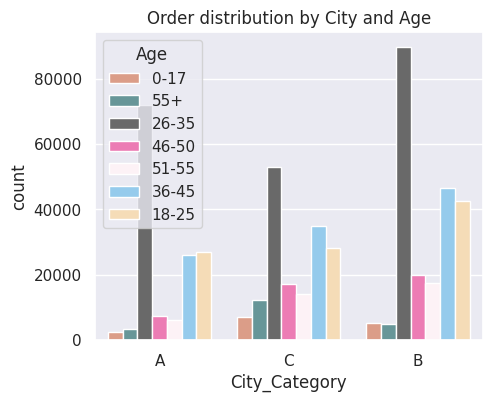

In [26]:
sns.set(rc={'figure.figsize':(5,4)})
palette=['DarkSalmon','CadetBlue', 'DimGray', 'HotPink', 'LavenderBlush', 'LightSkyBlue', 'NavajoWhite']
sns.countplot(x='City_Category', hue='Age', data =df, palette=palette)
title = 'Order distribution by City and Age'
pyp.title(title)

##### **3.13) Order distibution as per occupation**

In [27]:
df.groupby(by='Occupation')['Purchase'].sum()

Occupation
0     625814811
1     414552829
2     233275393
3     160428450
4     657530393
5     112525355
6     185065697
7     549282744
8      14594599
9      53619309
10    114273954
11    105437359
12    300672105
13     71135744
14    255594745
15    116540026
16    234442330
17    387240355
18     60249706
19     73115489
20    292276985
Name: Purchase, dtype: int64

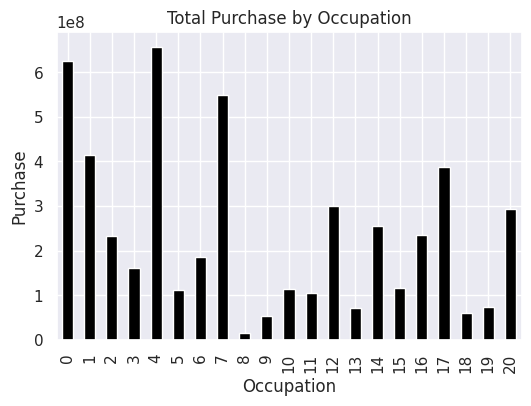

In [28]:
df.groupby(by='Occupation')['Purchase'].sum().plot(
    kind='bar',
    grid=True,
    color='black',
    figsize=(6,4)

)

pyp.xlabel('Occupation')
pyp.ylabel('Purchase')
pyp.title('Total Purchase by Occupation')



pyp.show()


##### **3.14) Order distibution as per occupation & marital status**

Text(0.5, 1.0, 'Order distibution based on Occupation & Marital status')

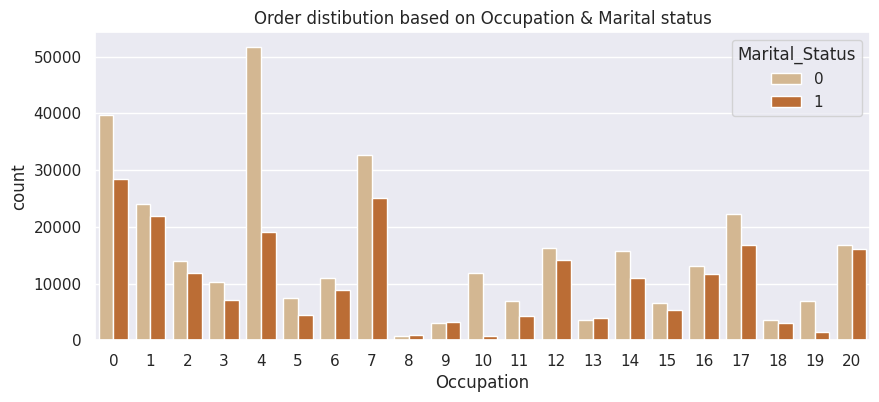

In [29]:
sns.set(rc = {'figure.figsize':(10,4)})
palette=['BurlyWood','Chocolate']
title = 'Order distibution based on Occupation & Marital status'
sns.countplot(x = df['Occupation'], hue= df['Marital_Status'], data=df, palette=palette)
pyp.title(title)

##### **3.15) Combining Marital Status and Gender for Analysis**

In [30]:
l = []

for i in range(len(df)):
    l.append(str(df['Gender'][i]) +"_"+ str(df['Marital_Status'][i]))

df['Gender_Marital'] = l

In [31]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Gender_Marital
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<ipython-input-32-0e433abff5a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Gender_Marital'], palette=palette)


Text(0.5, 1.0, 'Order distribution by Gender and Marital Status')

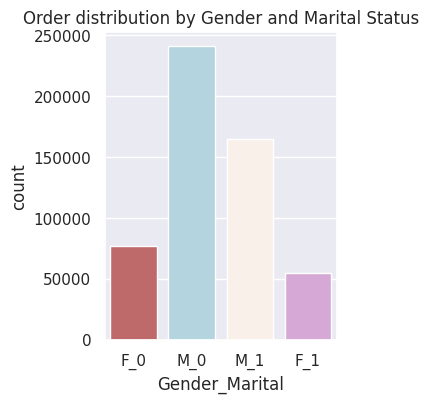

In [32]:
sns.set(rc = {'figure.figsize':(3,4)})
palette=['IndianRed','LightBlue', 'Linen', 'Plum']
sns.countplot(x = df['Gender_Marital'], palette=palette)
title = 'Order distribution by Gender and Marital Status'
pyp.title(title)

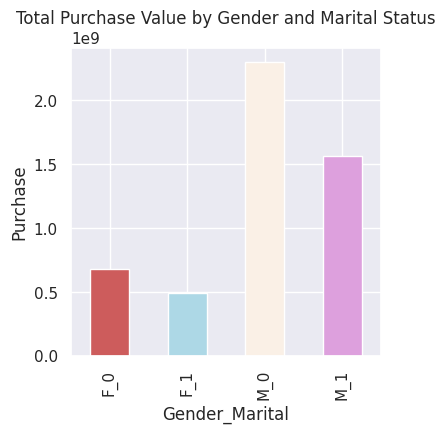

In [33]:
df.groupby(by='Gender_Marital')['Purchase'].sum().plot(
    kind='bar',
    grid=True,
    color=['IndianRed','LightBlue', 'Linen', 'Plum'],
    figsize=(4,4)

)

pyp.xlabel('Gender_Marital')
pyp.ylabel('Purchase')
pyp.title('Total Purchase Value by Gender and Marital Status')



pyp.show()


##### 3.16) Order distribution as per marital,gender & product category

Text(0.5, 1.0, 'Order distribution by Gender, Marital Status and Product Category')

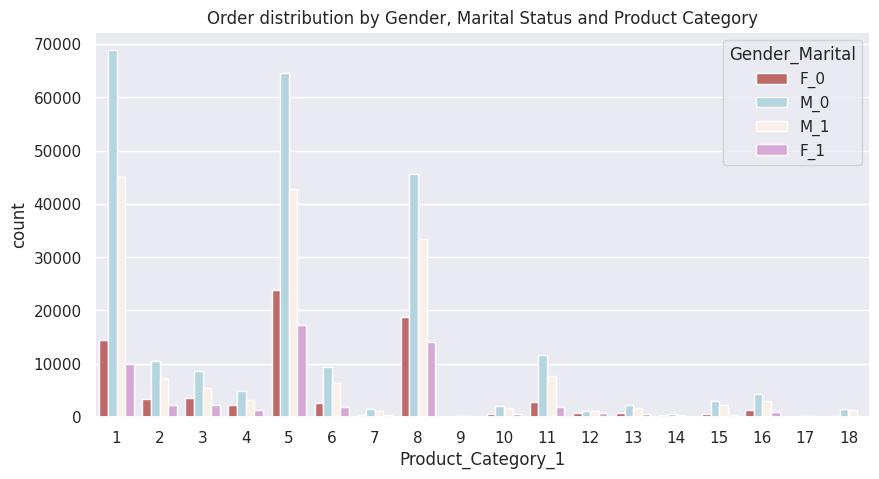

In [34]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.countplot(x = df['Product_Category_1'],hue=df['Gender_Marital'], palette=palette )
palette=['IndianRed','LightBlue', 'Linen', 'Plum']
title = 'Order distribution by Gender, Marital Status and Product Category'
pyp.title(title)


3.17) Analyzing Sales of Most Purchased Products

<Axes: title={'center': 'Top 10 Products by Revenue generated'}, ylabel='Product_ID'>

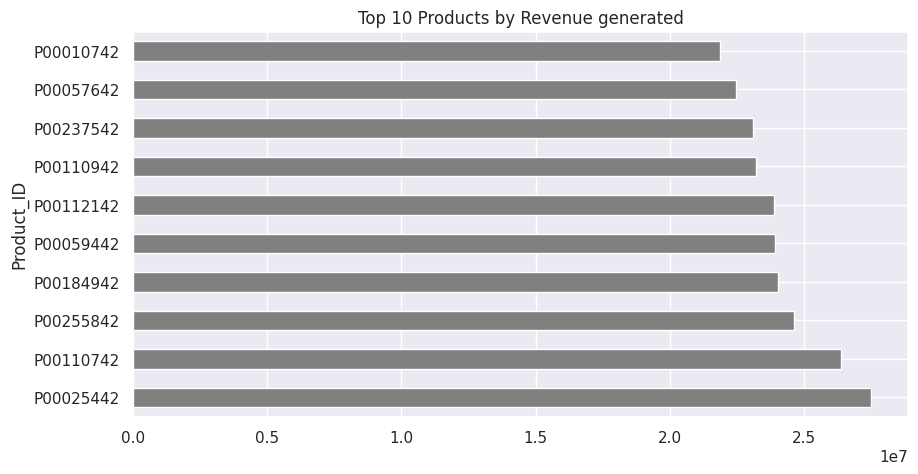

In [35]:
df.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head(10).plot(kind = 'barh', color='grey', title='Top 10 Products by Revenue generated')

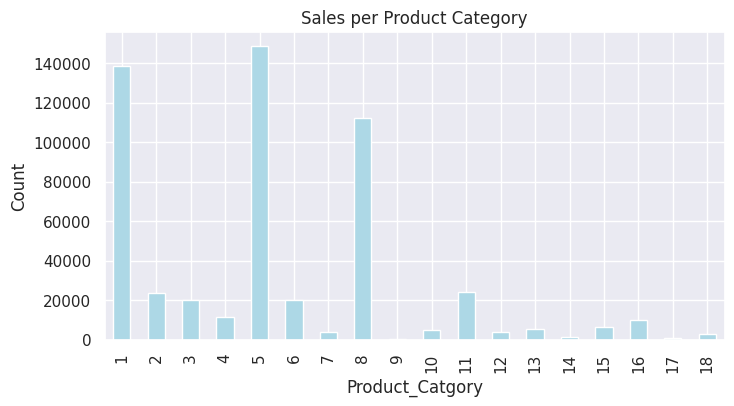

In [36]:
df.groupby(by='Product_Category_1')['Product_Category_1'].count().plot(
    kind='bar',
    grid=True,
    color=['LightBlue'],
    figsize=(8,4)

)

pyp.xlabel('Product_Catgory')
pyp.ylabel('Count')
pyp.title('Sales per Product Category')



pyp.show()

### **Assumptions:**
1. Marital Status 0 denotes Unmarried while Marital Status 1 denotes Married.

### **Observations:**

1. Products P00025442 and P00110742 generated the maximum revenue.
Unmarried males bought the maximum number of products and they purchased the highest order values in total.
2. Consumers under age category 51-55 have the highest average purchase order.
3. Males constitue a higher purchase value (76%) as compared to females.
4. Maximum number of products were purchased by age category 26-35. This age category also spend the maximum money.
5. In each age category, males purchase almost 3 times the products purchases by females.
6. Males of age category 26-35 purchase almost 16 times products compared to females of age category 46-55.
7. City Category B spent the most amount of money out of all 3 cities.
8. Consumers of Occupation 4 spent around 65 crores, followed by Occupation 0 who spent 62 crore and Occupation 7 spent 55 Crores.
8. Unmarried consumers of Occupation 4 purchased the maximum number of products.
9. Product Category 5, Product Category 1, Product Category 8 generated the highest sales respectively while Product Category 9, Product Category 17, Product Category 14 generated the lowest sales.

### **Marketing Recommendations:**

**Products:**

1. Focus marketing efforts on high-revenue products P00025442 and P00110742.

**Demographics:**

1. Target unmarried males, especially in the 26-35 age group, with marketing campaigns tailored to their preferences and purchase habits. This demographic exhibits the highest purchase volume and value.
2. Consider strategies to attract more female customers, particularly in the 46-55 age category, where a significant gap exists compared to male purchases.

**Location:**

1. Allocate budget towards marketing in City Category B, which generated the highest overall spending.

**Occupations:**

1. Focus marketing efforts on occupations 4, 0, and 7, which demonstrated the highest spending power. Develop targeted campaigns highlighting product benefits relevant to these professions.

**Marital Status:**

1. Consider strategies to attract both married and unmarried customers, as both segments showed significant purchasing activity.

**Product Categories:**

1. Promote top-selling product categories 5, 1, and 8 with focused campaigns emphasizing their popularity and success.
2. Analyze reasons behind lower sales in categories 9, 17, and 14 and develop strategies to improve their appeal.




